These first commands are only to import the modules that we are going to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

Now let's generate a synthetic dataset

In [4]:
features, true_labels = make_blobs(
    n_samples=500,
    centers=10,
    cluster_std=1,
    n_features=2,
    random_state = 42
)

Let's standardize

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

now time for clustering (kmeans)

In [8]:
numclusters = [5,6,7,8,9,10]
for k in numclusters:
    kmeans = KMeans(
        init="random",
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=42
    )

Now let's explore the sum of the squared errors as a function of the number of clusters

In [9]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [10]:
sse = []
for k in numclusters:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


Now let's plot the SSE

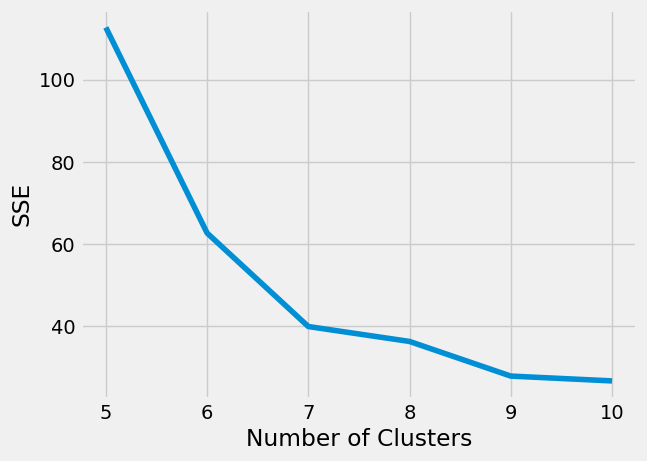

In [11]:
plt.style.use("fivethirtyeight")
plt.plot(numclusters, sse)
plt.xticks(numclusters)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
